In [2]:
import os

def json2yolo(annotations, dst_dir):
    for image in annotations['images']:
        # Extract image information
        file_name = image['file_name']
        width = image['width']
        height = image['height']
        annotations = image.get('annotations', [])
        
        yolo_lines = []
        for ann in annotations:
            # Get category_id as the class identifier
            category_id = ann['category_id']
            # Extract the bounding box coordinates
            x_min, y_min, w, h = ann['bbox']
            
            # Calculate normalized center coordinates and dimensions
            x_center = (x_min + w / 2) / width
            y_center = (y_min + h / 2) / height
            w_norm = w / width
            h_norm = h / height
            
            # Format the line with 6 decimal places
            line = f"{category_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}"
            yolo_lines.append(line)
        
        # Create the YOLO format .txt file
        # txt_filename = os.path.splitext(file_name)[0] + '.txt'
        txt_filename = os.path.join(dst_dir, os.path.splitext(file_name)[0] + '.txt')
        with open(txt_filename, 'w') as f:
            f.write('\n'.join(yolo_lines))

In [3]:
import json

ann_path = r"X:\doc_layout_analysis\publaynet\labels\val.json"
ann_json = json.load(open(ann_path))
dst_dir = r"X:\doc_layout_analysis\publaynet\train-0\labels"
os.makedirs(dst_dir, exist_ok=True)
json2yolo(ann_json, dst_dir)

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import numpy as np

def visualize(img, anns):


    img = cv2.imread(img)
    for ann in anns:
        cls, x, y, w, h = ann
        x = int(float(x) * img.shape[1])
        y = int(float(y) * img.shape[0])
        w = int(float(w) * img.shape[1])
        h = int(float(h) * img.shape[0])
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img


def read_annotations(label):
    with open(label, "r") as f:
        lines = f.readlines()
    anns = []
    for line in lines:
        cls, x, y, w, h = line.split()
        anns.append((cls, x, y, w, h))
    return anns

seed = 4895
root = r"X:\doc_layout_analysis\publaynet\train-0"
images_dir = os.path.join(root, "images")
labels_dir = os.path.join(root, "labels")

<class 'NoneType'>


TypeError: Image data of dtype object cannot be converted to float

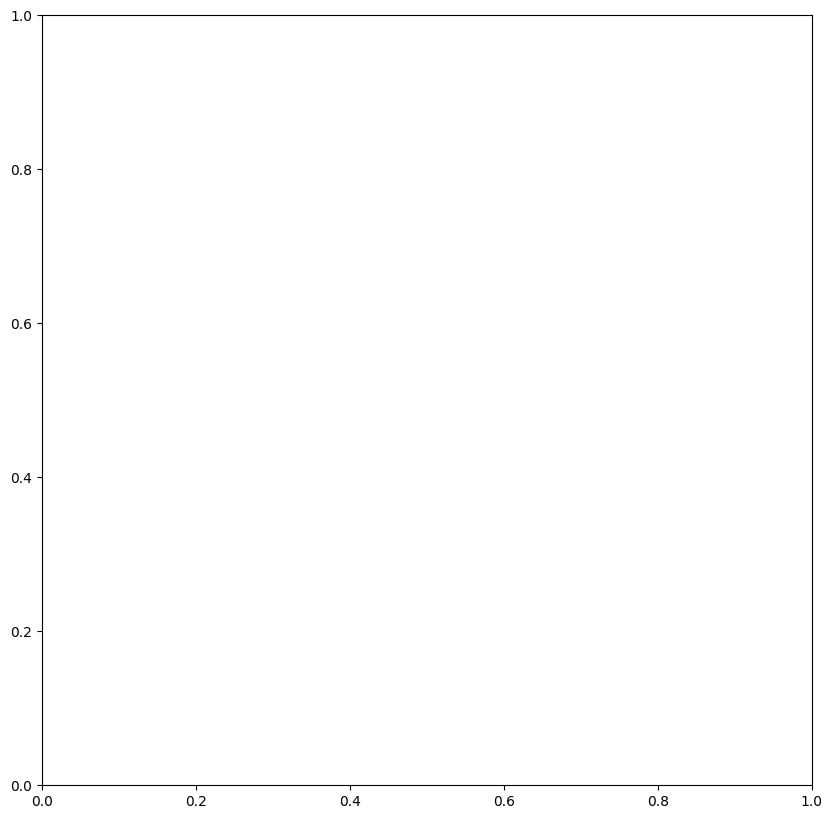

In [ ]:
seed = 598
label = os.path.join(labels_dir, os.listdir(labels_dir)[seed])
img = os.path.join(images_dir, Path(label).stem + '.jpg')
# img = os.path.join(images_dir, os.listdir(images_dir)[seed])
# label = os.path.join(labels_dir, Path(img).stem + '.txt')
img = visualize(img, read_annotations(label))

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()